In [46]:
import os   #These two are useful modules
import sys

import numpy as np #Numerical Python

In [47]:
# you can run the pwd command (Print Working Directory) to see your directory
!pwd

/home/jovyan/work/grlmrc/PLS/Code


In [48]:
#or you can run ls command to list the directory where you are
# (-l indicates that you can see all the properties of the file)
!ls -l

total 1344
-rw-r--r-- 1 jovyan users  225118 Feb 16 16:39 ingegneria_cisia.ipynb
-rw-r--r-- 1 jovyan users 1131630 Feb 16 16:43 scienze_cisia.ipynb
-rw-r--r-- 1 jovyan users   16370 Feb 16 16:09 scienze_cisia_read.ipynb


In [49]:
#or the one above you
!ls -l ../

total 12
drwxr-sr-x 3 jovyan users 4096 Feb 16 16:43 Code
drwxr-sr-x 3 jovyan users 4096 Feb 16 16:38 Data
drwxr-sr-x 2 jovyan users 4096 Feb 16 14:02 results


### Le't retrieve the data
The data are stored in a "data" directory at the same level of the "code" directory where you are now. Let's do some work to navigate the directory...
We will use the *os* module, in particular the *os.path* submodule.

**Note**: In this case we define the directories directly in this notebook, instead of using environment variables. For this examples, it is easier...

In [50]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"Data")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /home/jovyan/work/grlmrc/PLS/Code
Main directory is /home/jovyan/work/grlmrc/PLS
data dir is /home/jovyan/work/grlmrc/PLS/Data


### Opening and exploring a file
First of all, we will open a file and explore it, by excluding comments, and deciding how many data lines exists

In [51]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "CISIA_AI02_Ingegneria.txt"

#we use the open command
# IMPORTANT! The file is in the data directory, so we need to use the join command

data_file = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
lines = data_file.readlines()

#let's print the first 20 lines...
#print(lines)

In [52]:
# We can ue the split function to split a long string. 
# Here we use the comma as separator, but one can use also other characters
studenti = lines[0].split('{"codiceStudente":')
studenti_eff=[]
cod_fis=[]
#print("file contains %d students: \n" % (len(studenti)-1))
#print(len(studenti[2]))

for li in range(1,len(studenti)):
    if len(studenti[li])>50:
        studenti_eff.append(studenti[li])

print("file contains %d students, but only %d have datas associated: \n" % ((len(studenti)-1),len(studenti_eff)))
#print("file contains %d students: \n" % len(studenti_eff))
for li in range(0,len(studenti_eff)):
    #print(studenti_eff[li],'\n')
    #print(studenti_eff[li][1:17])
    cod_fis.append(studenti_eff[li][1:17])
    
print(studenti_eff[0],'\n')
print(studenti_eff[1],'\n')

file contains 1923 students, but only 188 have datas associated: 

"PRRLNZ00T29F839O","elencoRisultatiTest":[{"data":"2019-02-22","sede":"Universita' degli studi di Napoli Parthenope, sede di NAPOLI PARTHENOPE INGEGNERIA","punteggio":"77.5","risposteCorrette":"78","risposteErrate":"2","risposteNulle":"0","elencoRisulatiSezione":[{"codice":"TCIN01","punteggio":"20","risposteCorrette":"20","risposteErrate":"0","risposteNulle":"0"},{"codice":"TCIN02","punteggio":"10","risposteCorrette":"10","risposteErrate":"0","risposteNulle":"0"},{"codice":"TCIN03","punteggio":"10","risposteCorrette":"10","risposteErrate":"0","risposteNulle":"0"},{"codice":"TCIN04","punteggio":"7.5","risposteCorrette":"8","risposteErrate":"2","risposteNulle":"0"},{"codice":"TCIN05","punteggio":"30","risposteCorrette":"30","risposteErrate":"0","risposteNulle":"0"}]}]}, 

"CCCTTR00L19H282K","elencoRisultatiTest":[{"data":"2019-05-16","sede":"Universita' degli studi di Perugia - Dipartimento di Ingegneria, sede di PERUGIA 

In [53]:
import re
dictio={}
for per in range(len(cod_fis)):
    studente_temp = studenti_eff[per].split('{"data":')
    dictio[cod_fis[per]]={}
    for sez in range(1,len(studente_temp)):
        dictio[cod_fis[per]][sez]={}
        dati_studente_codici = studente_temp[sez].split('{"codice":"')
        dati_studente_sez = studente_temp[sez].split('","')
        data=dati_studente_sez[0][len('"'):]
        sede=dati_studente_sez[1][len('sede":"'):]
        punteggio=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", dati_studente_sez[2])))
        ris_corr=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", dati_studente_sez[3])))
        ris_err=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", dati_studente_sez[4])))
        ris_null=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", dati_studente_sez[5])))
        for cod in range(1,len(dati_studente_codici)):
            altro=dati_studente_codici[cod].split('","')
            code=altro[0]
            punt_code=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", altro[1])))
            ris_corr_code=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", altro[2])))
            ris_err_code=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", altro[3])))
            ris_null_code=np.float(np.asarray(re.findall(r"[-+]?\d*\.\d+|\d+", altro[4])))
            
            dictio[cod_fis[per]][sez][cod]=[data,sede,punteggio,ris_corr,ris_err,ris_null,code,punt_code,ris_corr_code,ris_err_code,ris_null_code]
        

In [54]:
count=0
file_uno = open(data_dir + "/dati_ordinati_ridotti_CISIA_AI02_Ingegneria.txt", "w")
file_uno.write("Codice fiscale; Tentativo; Data; Sede; Punteggio; Risposte corrette; Risposte errate; Risposte Nulle" + '\n')
for a in range(len(cod_fis)):
    print('\n')
    print(cod_fis[a])
    #file_uno.write(cod_fis[a]+', ')
    for b in range(1,5):
        if b in dictio[cod_fis[a]].keys():
            print('Tentativo numero %d'%b)
            file_uno.write(cod_fis[a]+'; ')
            file_uno.write('Tentativo numero %d; '%b)
            st=dictio[cod_fis[a]][b][1]
            for i in range(0, len(st) - 6 ): st.pop() 
            listToStr1 = '; '.join([str(elem) for elem in st])
            file_uno.write(listToStr1 + '\n')
            for c in range(1,15):
                if c in dictio[cod_fis[a]][b].keys():
                    s=dictio[cod_fis[a]][b][c]

                    print(s)
                    #print(dictio[cod_fis[a]][b][1])
                    #listToStr = ' '.join([str(elem) for elem in s])
                    #print(listToStr)
                    #file_uno.write(listToStr) 
                    #count=count+1
file_uno.close()
#print(count)
#print(dictio[cod_fis[0]][1][2])
#print(dictio[cod_fis[a]][b].keys())



PRRLNZ00T29F839O
Tentativo numero 1
['2019-02-22', "Universita' degli studi di Napoli Parthenope, sede di NAPOLI PARTHENOPE INGEGNERIA", 77.5, 78.0, 2.0, 0.0]
['2019-02-22', "Universita' degli studi di Napoli Parthenope, sede di NAPOLI PARTHENOPE INGEGNERIA", 77.5, 78.0, 2.0, 0.0, 'TCIN02', 10.0, 10.0, 0.0, 0.0]
['2019-02-22', "Universita' degli studi di Napoli Parthenope, sede di NAPOLI PARTHENOPE INGEGNERIA", 77.5, 78.0, 2.0, 0.0, 'TCIN03', 10.0, 10.0, 0.0, 0.0]
['2019-02-22', "Universita' degli studi di Napoli Parthenope, sede di NAPOLI PARTHENOPE INGEGNERIA", 77.5, 78.0, 2.0, 0.0, 'TCIN04', 7.5, 8.0, 2.0, 0.0]
['2019-02-22', "Universita' degli studi di Napoli Parthenope, sede di NAPOLI PARTHENOPE INGEGNERIA", 77.5, 78.0, 2.0, 0.0, 'TCIN05', 30.0, 30.0, 0.0, 0.0]


CCCTTR00L19H282K
Tentativo numero 1
['2019-05-16', "Universita' degli studi di Perugia - Dipartimento di Ingegneria, sede di PERUGIA INGEGNERIA", 45.25, 50.0, 27.0, 3.0]
['2019-05-16', "Universita' degli studi di Perugi

In [58]:
# Clearly, we need to work a little bit more, for instance 
# we can remove the new line that is at each end, with the command strip("\n")

#we can create an output list with only the lines that we want
out_list=[]

#len is a powerful function that returns the length of a line

for li in range(10):
    line = divine_lines[li].strip("\n")
    if (len(line)>0):
        if (line[0]!="#"):
            print(line)
            out_list.append(line)
            
print("** File contains %d data lines" % len(out_list))

  Nel mezzo del cammin di nostra vita
mi ritrovai per una selva oscura
ché la diritta via era smarrita.
  Ahi quanto a dir qual era è cosa dura
esta selva selvaggia e aspra e forte
** File contains 5 data lines


### Reading a CSV file with come comments and a header
A CSV file can contain some initial comments, that now we know how to skip, and could contain a set of data separated by a character. The first line can be used as header file.

In [59]:
#define the filename, in this case is in the hw-data/hw01-data directory
planets_data_filename = "planets.csv"

#we use the open command
planets_data_file = open(os.path.join(data_dir,planets_data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
planets_lines = planets_data_file.readlines()

#let's print the first 20 lines...
print(planets_lines[0:20])

['# Planetary data\n', '# From https://devstronomy.com/\n', 'planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,aphelion,orbital_period,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field\n', 'Mercury,0.330,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,69.8,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes\n', 'Venus,4.87,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,108.9,224.7,35.0,3.4,0.007,177.4,464,92,0,No,No\n', 'Earth,5.97,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,152.1,365.2,29.8,0.0,0.017,23.4,15,1,1,No,Yes\n', 'Mars,0.642,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,249.2,687.0,24.1,1.9,0.094,25.2,-65,0.01,2,No,No\n', 'Jupiter,1898,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,816.6,4331,13.1,1.3,0.049,3.1,-110,Unknown*,79,Yes,Yes\n', 'Saturn,568,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,1514.5,10747,9.7,2.5,0.057,26.7,

In [60]:
# First, remove the comments as we did before..

#we can create an output list with only the lines that we want
out_list=[]

#len is a powerful function that returns the length of a line

for li in range(10):
    line = planets_lines[li].strip("\n")
    if (len(line)>0):
        if (line[0]!="#"):
            print(line)
            out_list.append(line)
            
print("** File contains %d data lines" % len(out_list))

planet,mass,diameter,density,gravity,escape_velocity,rotation_period,length_of_day,distance_from_sun,perihelion,aphelion,orbital_period,orbital_velocity,orbital_inclination,orbital_eccentricity,obliquity_to_orbit,mean_temperature,surface_pressure,number_of_moons,has_ring_system,has_global_magnetic_field
Mercury,0.330,4879,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,69.8,88.0,47.4,7.0,0.205,0.034,167,0,0,No,Yes
Venus,4.87,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,108.9,224.7,35.0,3.4,0.007,177.4,464,92,0,No,No
Earth,5.97,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,152.1,365.2,29.8,0.0,0.017,23.4,15,1,1,No,Yes
Mars,0.642,6792,3933,3.7,5.0,24.6,24.7,227.9,206.6,249.2,687.0,24.1,1.9,0.094,25.2,-65,0.01,2,No,No
Jupiter,1898,142984,1326,23.1,59.5,9.9,9.9,778.6,740.5,816.6,4331,13.1,1.3,0.049,3.1,-110,Unknown*,79,Yes,Yes
Saturn,568,120536,687,9.0,35.5,10.7,10.7,1433.5,1352.6,1514.5,10747,9.7,2.5,0.057,26.7,-140,Unknown*,62,Yes,Yes
Uranus,86.8,51118,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,3003.6,30

In [61]:
# We can use the first line as header containing the column names.
# IMPORTANT NOTE: you can see that the variables are kept among code cells.

header = out_list[0]

# We can ue the split function to split a long string. 
# Here we use the comma as separator, but one can use also other characters
column_names = header.split(",")

print("header contains %d columns" % len(column_names))
print(column_names)

header contains 21 columns
['planet', 'mass', 'diameter', 'density', 'gravity', 'escape_velocity', 'rotation_period', 'length_of_day', 'distance_from_sun', 'perihelion', 'aphelion', 'orbital_period', 'orbital_velocity', 'orbital_inclination', 'orbital_eccentricity', 'obliquity_to_orbit', 'mean_temperature', 'surface_pressure', 'number_of_moons', 'has_ring_system', 'has_global_magnetic_field']


In [62]:
# Now we can create a dictionary of list for each column name, and fill it. 
# We will use an index for the column (ci) and one for the rows (ri)

#create and init a dictionary of lists..
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]


#we start from 1 since we want to skip the first line containing the headers.
for ri in range(1,len(out_list)):
    data_line = out_list[ri].split(",")
    print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])

Processing row 1
Processing row 2
Processing row 3
Processing row 4
Processing row 5
Processing row 6
Processing row 7


In [63]:
#print for example the names and mass of planets
print(data_dict["planet"])    

['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus']


### Convert to Numpy arrays and plot
At this point, you can convert the lists into Numpy Arrays and do some plotting using matplotlib

Text(0.5, 0, 'Orbital Period [days]')

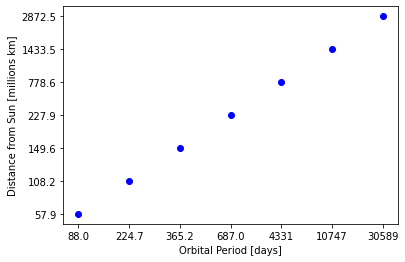

In [64]:
# At this point you can do plots etc...
import matplotlib.pyplot as plt

#first, convert list to numpy arrays...
data_dict["distance_from_sun"]=np.asarray(data_dict["distance_from_sun"])
data_dict["orbital_period"]=np.asarray(data_dict["orbital_period"])

plt.scatter(data_dict["orbital_period"],data_dict["distance_from_sun"],marker="o",color="blue")
plt.ylabel("Distance from Sun [millions km]")
plt.xlabel("Orbital Period [days]")


Text(0.5, 0, 'Mass [10^24 kg]')

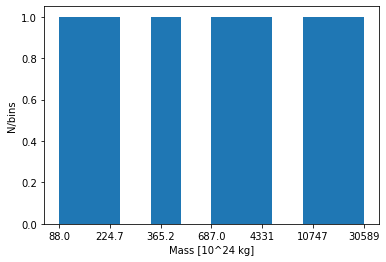

In [65]:
#..or plot histograms...

data_dict["mass"]=np.asarray(data_dict["mass"])

plt.hist(data_dict["orbital_period"])
plt.ylabel("N/bins")
plt.xlabel("Mass [10^24 kg]")


### Writing output files
With Python you can also write output files. You start from the command open but using the "w" option, that stands for write mode

In [66]:
#define the filename, of course please pay attention to the path. We can use the results path

test_out_filename = os.path.join(results_dir,"test_output.txt")

#we use the open command
test_out_file = open(test_out_filename,"w")  #writing mode

for i in range(10): 
    out_line = str(i)+","+str(i*i)+"\n"   #just print a y=x^2 law
    test_out_file.write(out_line)
    
#don't forget to close the file..
test_out_file.close() 

In [68]:
#the file should be there...let's check it with ls
!ls -l ../results

total 1
-rwxrwxrwx. 1 root root 46 Mar 12 08:14 test_output.txt
